Step 4: In this phase different optimizers will be implemented for the 6 models from Step 3.

In [1]:
# Import libraries

import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import plot_model



import tensorflow_datasets as tfds

In [2]:
# Load the data

p_camelyon, p_camelyon_info = tfds.load("patch_camelyon", with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteBDRB4T/patch_camelyon-test.tfrecord


  0%|          | 0/32768 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteBDRB4T/patch_camelyon-train.tfrecord


  0%|          | 0/262144 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteBDRB4T/patch_camelyon-validation.tfrecord


  0%|          | 0/32768 [00:00<?, ? examples/s]

Dataset patch_camelyon downloaded and prepared to /root/tensorflow_datasets/patch_camelyon/2.0.0. Subsequent calls will reuse this data.


In [5]:
# Defining a "normalize" function to process the data before feeding it into the deep neural network. 

def normalize(x):
  image, label = x['image'], x['label']
  image = tf.image.convert_image_dtype(image, tf.float32)
  label = tf.one_hot(label, 2, dtype=tf.float32)
  return image, label

In [6]:
# Applying "normalize" function along with others to the data

# Processing the training dataset
train_ds = p_camelyon['train'].map(normalize, num_parallel_calls=8)
train_ds = train_ds.shuffle(1024)
train_ds = train_ds.repeat()
train_ds = train_ds.batch(128)
train_ds = train_ds.prefetch(2)

# Processing validation dataset
validation_ds = p_camelyon['validation'].map(normalize, num_parallel_calls=8)
validation_ds = validation_ds.repeat()
validation_ds = validation_ds.batch(128)
validation_ds = validation_ds.prefetch(2)

#Processing the test dataset
test_ds = p_camelyon['test'].map(normalize, num_parallel_calls=8)
test_ds = test_ds.batch(128)
test_ds = test_ds.prefetch(2)

#Seperating image and label into different variables
train_images, train_labels = next(iter(train_ds))
valid_images, valid_labels = next(iter(validation_ds))
test_images, test_labels  = next(iter(test_ds))


In [7]:
import math

batch_size_for_training = 64
batch_size_for_validation = 128
batch_size_for_test = 128

training_size = 262144
validation_size = 32768
test_size =  32768
        

# Calculate steps for training and testing the model
calculate_steps_training = lambda x: int(math.ceil(1. * x / batch_size_for_training))
calculate_steps_validation = lambda x: int(math.ceil(1. * x / batch_size_for_validation))
calculate_steps_test= lambda x: int(math.ceil(1. * x / batch_size_for_test))

steps_per_epoch = calculate_steps_training(training_size) 
validation_steps = calculate_steps_validation(validation_size)
steps = calculate_steps_test(test_size)

print("Training steps: ", steps_per_epoch)
print("Validation steps: ", validation_steps)
print("Testing steps: ", steps)


Training steps:  4096
Validation steps:  256
Testing steps:  256


In [8]:
import matplotlib.pyplot as plt

def plot_hist(history):
  plt.plot(history.history["acc"])
  plt.plot(history.history["val_acc"])
  plt.title("Model Accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(["train", "validation"], loc="upper left")
  plt.show()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        18496 

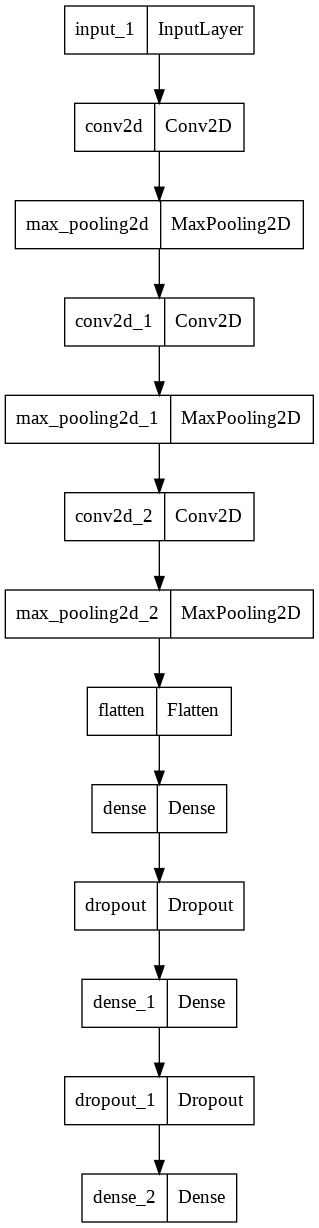

In [ ]:
# Building the Convolutonal Neural Network Model 1.1.1 Version 1

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Relu activation functions only, with softmax activation function for the last Dense layer
x = Conv2D(16, (3,3), activation='relu', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = sgd
# Loss function = hinge
model_1_1_1_version_1 = Model(inputs=input, outputs = output)
model_1_1_1_version_1.compile(optimizer='sgd', 
              loss=tf.keras.losses.Hinge(),
              metrics=['acc'])

model_1_1_1_version_1.summary()
plot_model(model_1_1_1_version_1)

In [ ]:
# Building the Convolutonal Neural Network Model 1.1.2 Version 1

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Relu activation functions only, with softmax activation function for the last Dense layer
x = Conv2D(16, (3,3), activation='relu', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = adagrad
# Loss function = hinge
model_1_1_2_version_1 = Model(inputs=input, outputs = output)
model_1_1_2_version_1.compile(optimizer='adagrad', 
              loss=tf.keras.losses.Hinge(),
              metrics=['acc'])

model_1_1_2_version_1.summary()
#plot_model(model_1_1_2_version_1)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 47, 47, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 64)        1849

In [ ]:
# Building the Convolutonal Neural Network Model 1.1.3 Version 1

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Relu activation functions only, with softmax activation function for the last Dense layer
x = Conv2D(16, (3,3), activation='relu', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = RMSprop
# Loss function = hinge
model_1_1_3_version_1 = Model(inputs=input, outputs = output)
model_1_1_3_version_1.compile(optimizer='RMSprop', 
              loss=tf.keras.losses.Hinge(),
              metrics=['acc'])

model_1_1_3_version_1.summary()
#plot_model(model_1_1_3_version_1)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 47, 47, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 20, 20, 64)        1849

In [ ]:
# Building the Convolutonal Network Model 1.2.1 Version 1

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Relu activation functions only, with softmax activation function for the last Dense layer
x = Conv2D(16, (3,3), activation='relu', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = sgd
# Loss function =   MSE
model_1_2_1_version_1 = Model(inputs=input, outputs = output)
model_1_2_1_version_1.compile(optimizer='sgd', 
              loss='MSE',
              metrics=['acc'])

model_1_2_1_version_1.summary()
#plot_model(model_1_2_1_version_1)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 47, 47, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 20, 64)        1849

In [ ]:
# Building the Convolutonal Network Model 1.2.2 Version 1

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Relu activation functions only, with softmax activation function for the last Dense layer
x = Conv2D(16, (3,3), activation='relu', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = adagrad
# Loss function =   MSE
model_1_2_2_version_1 = Model(inputs=input, outputs = output)
model_1_2_2_version_1.compile(optimizer='adagrad', 
              loss='MSE',
              metrics=['acc'])

model_1_2_2_version_1.summary()
#plot_model(model_1_2_2_version_1)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 47, 47, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 20, 64)        1849

In [ ]:
# Building the Convolutonal Network Model 1.2.3 Version 1

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Relu activation functions only, with softmax activation function for the last Dense layer
x = Conv2D(16, (3,3), activation='relu', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = RMSprop
# Loss function =   MSE
model_1_2_3_version_1 = Model(inputs=input, outputs = output)
model_1_2_3_version_1.compile(optimizer='RMSprop', 
              loss='MSE',
              metrics=['acc'])

model_1_2_3_version_1.summary()
#plot_model(model_1_2_3_version_1)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 47, 47, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 20, 20, 64)        1849

In [ ]:
# Building the Convolutonal Network Model 2.1.1 Version 1

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Sigmoid activation functions only with softmax for the last Dense layer

x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='sigmoid')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='sigmoid')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = sgd
# Loss function = hinge
model_2_1_1_version_1 = Model(inputs=input, outputs = output)
model_2_1_1_version_1.compile(optimizer='sgd', 
              loss=tf.keras.losses.Hinge(),
              metrics=['acc'])

model_2_1_1_version_1.summary()
#plot_model(model_2_1_1_version_1)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 47, 47, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 20, 20, 64)        1849

In [ ]:
# Building the Convolutonal Network Model 2.1.2 Version 1

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Sigmoid activation functions only with softmax for the last Dense layer

x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='sigmoid')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='sigmoid')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = Adagrad
# Loss function = hinge
model_2_1_2_version_1 = Model(inputs=input, outputs = output)
model_2_1_2_version_1.compile(optimizer='adagrad', 
              loss=tf.keras.losses.Hinge(),
              metrics=['acc'])

model_2_1_2_version_1.summary()
#plot_model(model_2_1_2_version_1)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 47, 47, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 20, 20, 64)        1849

In [ ]:
# Building the Convolutonal Network Model 2.1.3 Version 1

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Sigmoid activation functions only with softmax for the last Dense layer

x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='sigmoid')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='sigmoid')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = RMSprop
# Loss function = hinge
model_2_1_3_version_1 = Model(inputs=input, outputs = output)
model_2_1_3_version_1.compile(optimizer='RMSprop', 
              loss=tf.keras.losses.Hinge(),
              metrics=['acc'])

model_2_1_3_version_1.summary()
#plot_model(model_2_1_3_version_1)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 47, 47, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 20, 20, 64)        1849

In [9]:
# Building the Convolutonal Network Model 2.2.1 Version 1

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Sigmoid activation functions only with softmax for the last Dense layer

x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='sigmoid')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='sigmoid')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = sgd
# Loss function = MSE
model_2_2_1_version_1 = Model(inputs=input, outputs = output)
model_2_2_1_version_1.compile(optimizer='sgd', 
              loss='MSE',
              metrics=['acc'])

model_2_2_1_version_1.summary()
#plot_model(model_2_2_1_version_1)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        18496 

In [10]:
# Building the Convolutonal Network Model 2.2.2 Version 1

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Sigmoid activation functions only with softmax for the last Dense layer

x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='sigmoid')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='sigmoid')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = Adagrad
# Loss function = MSE
model_2_2_2_version_1 = Model(inputs=input, outputs = output)
model_2_2_2_version_1.compile(optimizer='adagrad', 
              loss='MSE',
              metrics=['acc'])

model_2_2_2_version_1.summary()
#plot_model(model_2_2_2_version_1)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 47, 47, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 64)        1849

In [11]:
# Building the Convolutonal Network Model 2.2.3 Version 1

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Sigmoid activation functions only with softmax for the last Dense layer

x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='sigmoid')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='sigmoid')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = RMSprop
# Loss function = MSE
model_2_2_3_version_1 = Model(inputs=input, outputs = output)
model_2_2_3_version_1.compile(optimizer='RMSprop', 
              loss='MSE',
              metrics=['acc'])

model_2_2_3_version_1.summary()
#plot_model(model_2_2_3_version_1)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 47, 47, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 20, 20, 64)        1849

In [12]:
# Building the Convolutonal Network Model 3.1.1 Version 1

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# A conbination of relu and sigmoid activation functions
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='sigmoid')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = sgd
# Loss function = hinge
model_3_1_1_version_1 = Model(inputs=input, outputs = output)
model_3_1_1_version_1.compile(optimizer='sgd', 
              loss=tf.keras.losses.Hinge(),
              metrics=['acc'])

model_3_1_1_version_1.summary()
#plot_model(model_3_1_1_version_1)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 47, 47, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 20, 64)        1849

In [13]:
# Building the Convolutonal Network Model 3.1.2 Version 1

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# A conbination of relu and sigmoid activation functions
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='sigmoid')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = Adagrad
# Loss function = hinge
model_3_1_2_version_1 = Model(inputs=input, outputs = output)
model_3_1_2_version_1.compile(optimizer='adagrad', 
              loss=tf.keras.losses.Hinge(),
              metrics=['acc'])

model_3_1_2_version_1.summary()
#plot_model(model_3_1_2_version_1)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 47, 47, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 20, 64)        1849

In [14]:
# Building the Convolutonal Network Model 3.1.3 Version 1

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# A conbination of relu and sigmoid activation functions
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='sigmoid')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = RMSprop
# Loss function = hinge
model_3_1_3_version_1 = Model(inputs=input, outputs = output)
model_3_1_3_version_1.compile(optimizer='RMSprop', 
              loss=tf.keras.losses.Hinge(),
              metrics=['acc'])

model_3_1_3_version_1.summary()
#plot_model(model_3_1_3_version_1)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 47, 47, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 20, 20, 64)        1849

In [15]:
# Building the Convolutonal Network Model 3.2.1 Version 1

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# A conbination of relu and sigmoid activation functions
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='sigmoid')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = sgd
# Loss function = MSE
model_3_2_1_version_1 = Model(inputs=input, outputs = output)
model_3_2_1_version_1.compile(optimizer='sgd', 
              loss='MSE',
              metrics=['acc'])

model_3_2_1_version_1.summary()
#plot_model(model_3_2_1_version_1)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 47, 47, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 20, 20, 64)        1849

In [16]:
# Building the Convolutonal Network Model 3.2.2 Version 1

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# A conbination of relu and sigmoid activation functions
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='sigmoid')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = Adagrad
# Loss function = MSE
model_3_2_2_version_1 = Model(inputs=input, outputs = output)
model_3_2_2_version_1.compile(optimizer='Adagrad', 
              loss='MSE',
              metrics=['acc'])

model_3_2_2_version_1.summary()
#plot_model(model_3_2_2_version_1)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 47, 47, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 20, 20, 64)        1849

In [17]:
# Building the Convolutonal Network Model 3.2.3 Version 1

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# A conbination of relu and sigmoid activation functions
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='sigmoid')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = RMSprop
# Loss function = MSE
model_3_2_3_version_1 = Model(inputs=input, outputs = output)
model_3_2_3_version_1.compile(optimizer='RMSprop', 
              loss='MSE',
              metrics=['acc'])

model_3_2_3_version_1.summary()
#plot_model(model_3_2_3_version_1)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 47, 47, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 20, 20, 64)        1849

In [18]:
import matplotlib.pyplot as plt

def plot_hist(history):
  plt.plot(history.history["acc"])
  plt.plot(history.history["val_acc"])
  plt.title("Model Accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(["train", "validation"], loc="upper left")
  plt.show()

Epoch 1/10
4096/4096 [==============================] - 158s 36ms/step - loss: 0.7868 - acc: 0.7229 - val_loss: 0.7532 - val_acc: 0.7472
Epoch 2/10
4096/4096 [==============================] - 145s 35ms/step - loss: 0.7215 - acc: 0.7801 - val_loss: 0.7419 - val_acc: 0.7599
Epoch 3/10
4096/4096 [==============================] - 149s 36ms/step - loss: 0.7082 - acc: 0.7933 - val_loss: 0.7351 - val_acc: 0.7661
Epoch 4/10
4096/4096 [==============================] - 145s 35ms/step - loss: 0.6937 - acc: 0.8085 - val_loss: 0.7116 - val_acc: 0.7897
Epoch 5/10
4096/4096 [==============================] - 149s 36ms/step - loss: 0.6777 - acc: 0.8250 - val_loss: 0.7137 - val_acc: 0.7882
Epoch 6/10
4096/4096 [==============================] - 173s 42ms/step - loss: 0.6678 - acc: 0.8346 - val_loss: 0.7082 - val_acc: 0.7928
Epoch 7/10
4096/4096 [==============================] - 149s 36ms/step - loss: 0.6598 - acc: 0.8426 - val_loss: 0.6930 - val_acc: 0.8086
Epoch 8/10
4096/4096 [===================

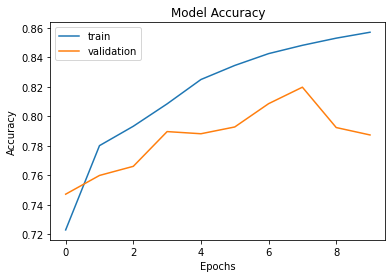

In [ ]:
# Training the model 1.1.1 Version 1

history_1_1_1_version_1= model_1_1_1_version_1.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
plot_hist(history_1_1_1_version_1)

Epoch 1/10
4096/4096 [==============================] - 154s 37ms/step - loss: 0.8280 - acc: 0.7052 - val_loss: 0.7499 - val_acc: 0.7560
Epoch 2/10
4096/4096 [==============================] - 143s 35ms/step - loss: 0.7265 - acc: 0.7802 - val_loss: 0.7440 - val_acc: 0.7590
Epoch 3/10
4096/4096 [==============================] - 152s 37ms/step - loss: 0.7207 - acc: 0.7832 - val_loss: 0.7432 - val_acc: 0.7593
Epoch 4/10
4096/4096 [==============================] - 170s 42ms/step - loss: 0.7178 - acc: 0.7851 - val_loss: 0.7422 - val_acc: 0.7595
Epoch 5/10
4096/4096 [==============================] - 148s 36ms/step - loss: 0.7160 - acc: 0.7864 - val_loss: 0.7376 - val_acc: 0.7623
Epoch 6/10
4096/4096 [==============================] - 149s 36ms/step - loss: 0.7145 - acc: 0.7878 - val_loss: 0.7366 - val_acc: 0.7630
Epoch 7/10
4096/4096 [==============================] - 147s 36ms/step - loss: 0.7133 - acc: 0.7887 - val_loss: 0.7377 - val_acc: 0.7639
Epoch 8/10
4096/4096 [===================

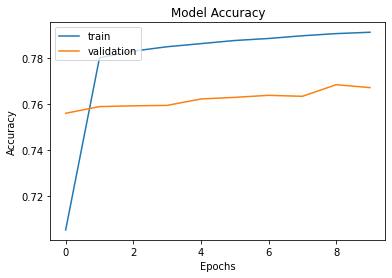

In [ ]:
# Training the model 1.1.2 Version 1

history_1_1_2_version_1= model_1_1_2_version_1.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
plot_hist(history_1_1_2_version_1)

Epoch 1/10
4096/4096 [==============================] - 150s 36ms/step - loss: 0.7747 - acc: 0.7255 - val_loss: 0.7681 - val_acc: 0.7318
Epoch 2/10
4096/4096 [==============================] - 170s 41ms/step - loss: 0.8715 - acc: 0.6285 - val_loss: 0.9996 - val_acc: 0.5004
Epoch 3/10
4096/4096 [==============================] - 147s 36ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 4/10
4096/4096 [==============================] - 149s 36ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 5/10
4096/4096 [==============================] - 150s 37ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 6/10
4096/4096 [==============================] - 148s 36ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 7/10
4096/4096 [==============================] - 150s 37ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 8/10
4096/4096 [===================

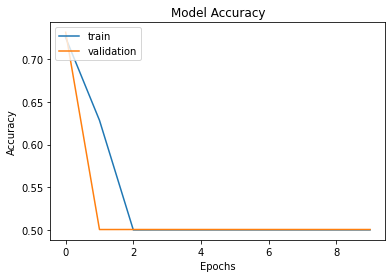

In [ ]:
# Training the model 1.1.3 Version 1

history_1_1_3_version_1= model_1_1_3_version_1.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
plot_hist(history_1_1_3_version_1)

Epoch 1/10
4096/4096 [==============================] - 149s 36ms/step - loss: 0.1730 - acc: 0.7456 - val_loss: 0.1540 - val_acc: 0.7682
Epoch 2/10
4096/4096 [==============================] - 169s 41ms/step - loss: 0.1486 - acc: 0.7904 - val_loss: 0.1586 - val_acc: 0.7640
Epoch 3/10
4096/4096 [==============================] - 145s 35ms/step - loss: 0.1419 - acc: 0.8007 - val_loss: 0.1473 - val_acc: 0.7901
Epoch 4/10
4096/4096 [==============================] - 147s 36ms/step - loss: 0.1315 - acc: 0.8173 - val_loss: 0.1302 - val_acc: 0.8078
Epoch 5/10
4096/4096 [==============================] - 150s 37ms/step - loss: 0.1219 - acc: 0.8325 - val_loss: 0.1362 - val_acc: 0.8031
Epoch 6/10
4096/4096 [==============================] - 148s 36ms/step - loss: 0.1146 - acc: 0.8434 - val_loss: 0.1227 - val_acc: 0.8250
Epoch 7/10
4096/4096 [==============================] - 150s 37ms/step - loss: 0.1097 - acc: 0.8505 - val_loss: 0.1244 - val_acc: 0.8213
Epoch 8/10
4096/4096 [===================

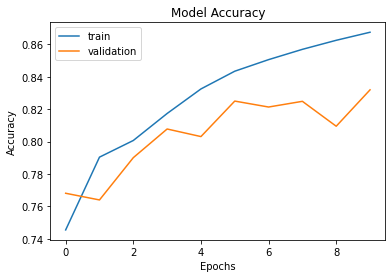

In [ ]:
# Training the model 1.2.1 Version 1

history_1_2_1_version_1= model_1_2_1_version_1.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
plot_hist(history_1_2_1_version_1)

Epoch 1/10
4096/4096 [==============================] - 148s 36ms/step - loss: 0.2118 - acc: 0.6676 - val_loss: 0.1536 - val_acc: 0.7695
Epoch 2/10
4096/4096 [==============================] - 170s 42ms/step - loss: 0.1579 - acc: 0.7784 - val_loss: 0.1534 - val_acc: 0.7680
Epoch 3/10
4096/4096 [==============================] - 145s 35ms/step - loss: 0.1535 - acc: 0.7850 - val_loss: 0.1536 - val_acc: 0.7681
Epoch 4/10
4096/4096 [==============================] - 148s 36ms/step - loss: 0.1515 - acc: 0.7876 - val_loss: 0.1532 - val_acc: 0.7680
Epoch 5/10
4096/4096 [==============================] - 157s 38ms/step - loss: 0.1500 - acc: 0.7900 - val_loss: 0.1539 - val_acc: 0.7693
Epoch 6/10
4096/4096 [==============================] - 146s 36ms/step - loss: 0.1489 - acc: 0.7915 - val_loss: 0.1529 - val_acc: 0.7717
Epoch 7/10
4096/4096 [==============================] - 150s 37ms/step - loss: 0.1477 - acc: 0.7933 - val_loss: 0.1541 - val_acc: 0.7682
Epoch 8/10
4096/4096 [===================

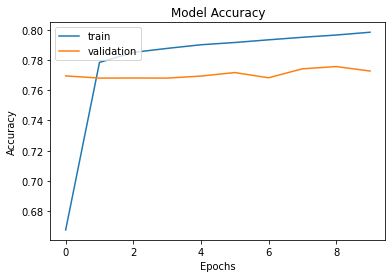

In [ ]:
# Training the model 1.2.2 Version_1

history_1_2_2_version_1= model_1_2_2_version_1.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
plot_hist(history_1_2_2_version_1)

Epoch 1/10
4096/4096 [==============================] - 149s 36ms/step - loss: 0.1253 - acc: 0.8261 - val_loss: 0.1130 - val_acc: 0.8453
Epoch 2/10
4096/4096 [==============================] - 171s 42ms/step - loss: 0.0817 - acc: 0.8919 - val_loss: 0.1533 - val_acc: 0.8178
Epoch 3/10
4096/4096 [==============================] - 153s 37ms/step - loss: 0.0671 - acc: 0.9127 - val_loss: 0.1135 - val_acc: 0.8484
Epoch 4/10
4096/4096 [==============================] - 160s 39ms/step - loss: 0.0596 - acc: 0.9235 - val_loss: 0.1074 - val_acc: 0.8524
Epoch 5/10
4096/4096 [==============================] - 150s 37ms/step - loss: 0.0545 - acc: 0.9307 - val_loss: 0.1295 - val_acc: 0.8393
Epoch 6/10
4096/4096 [==============================] - 155s 38ms/step - loss: 0.0515 - acc: 0.9350 - val_loss: 0.1437 - val_acc: 0.8271
Epoch 7/10
4096/4096 [==============================] - 150s 37ms/step - loss: 0.0491 - acc: 0.9380 - val_loss: 0.1228 - val_acc: 0.8370
Epoch 8/10
4096/4096 [===================

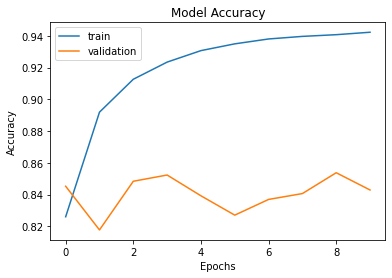

In [ ]:
# Training the model 1.2.3 Version 1

history_1_2_3_version_1= model_1_2_3_version_1.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
plot_hist(history_1_2_3_version_1)

Epoch 1/10
4096/4096 [==============================] - 148s 36ms/step - loss: 1.0001 - acc: 0.5000 - val_loss: 0.9996 - val_acc: 0.5005
Epoch 2/10
4096/4096 [==============================] - 171s 42ms/step - loss: 1.0001 - acc: 0.5000 - val_loss: 0.9996 - val_acc: 0.5005
Epoch 3/10
4096/4096 [==============================] - 150s 37ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9996 - val_acc: 0.5005
Epoch 4/10
4096/4096 [==============================] - 147s 36ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9996 - val_acc: 0.5005
Epoch 5/10
4096/4096 [==============================] - 149s 36ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9996 - val_acc: 0.5005
Epoch 6/10
4096/4096 [==============================] - 147s 36ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9996 - val_acc: 0.5005
Epoch 7/10
4096/4096 [==============================] - 149s 36ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9996 - val_acc: 0.5005
Epoch 8/10
4096/4096 [===================

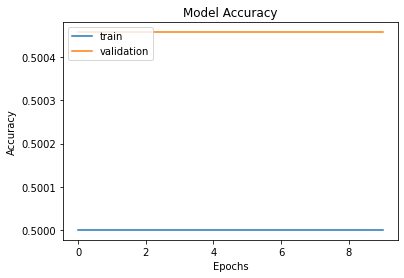

In [ ]:
# Training the model 2.1.1 Version 1

history_2_1_1_version_1= model_2_1_1_version_1.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
plot_hist(history_2_1_1_version_1)

Epoch 1/10
4096/4096 [==============================] - 149s 36ms/step - loss: 0.9998 - acc: 0.5005 - val_loss: 1.0002 - val_acc: 0.4995
Epoch 2/10
4096/4096 [==============================] - 171s 42ms/step - loss: 0.9999 - acc: 0.4993 - val_loss: 1.0001 - val_acc: 0.4995
Epoch 3/10
4096/4096 [==============================] - 149s 36ms/step - loss: 0.9998 - acc: 0.5004 - val_loss: 1.0001 - val_acc: 0.4995
Epoch 4/10
4096/4096 [==============================] - 149s 36ms/step - loss: 0.9998 - acc: 0.4999 - val_loss: 1.0001 - val_acc: 0.4995
Epoch 5/10
4096/4096 [==============================] - 148s 36ms/step - loss: 1.0002 - acc: 0.4995 - val_loss: 1.0001 - val_acc: 0.4995
Epoch 6/10
4096/4096 [==============================] - 147s 36ms/step - loss: 1.0002 - acc: 0.4995 - val_loss: 1.0001 - val_acc: 0.4995
Epoch 7/10
4096/4096 [==============================] - 150s 37ms/step - loss: 1.0001 - acc: 0.5004 - val_loss: 1.0001 - val_acc: 0.4995
Epoch 8/10
4096/4096 [===================

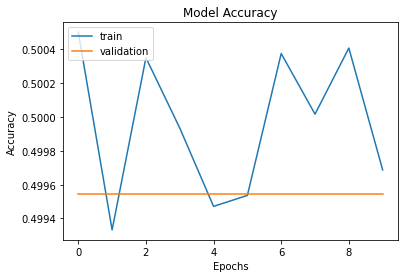

In [ ]:
# Training the model 2.1.2 Version 1

history_2_1_2_version_1= model_2_1_2_version_1.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
plot_hist(history_2_1_2_version_1)

Epoch 1/10
4096/4096 [==============================] - 156s 38ms/step - loss: 1.0007 - acc: 0.4988 - val_loss: 0.9996 - val_acc: 0.5005
Epoch 2/10
4096/4096 [==============================] - 146s 36ms/step - loss: 1.0004 - acc: 0.4998 - val_loss: 1.0005 - val_acc: 0.4995
Epoch 3/10
4096/4096 [==============================] - 152s 37ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 1.0005 - val_acc: 0.4995
Epoch 4/10
4096/4096 [==============================] - 147s 36ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 1.0005 - val_acc: 0.4995
Epoch 5/10
4096/4096 [==============================] - 153s 37ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 1.0005 - val_acc: 0.4995
Epoch 6/10
4096/4096 [==============================] - 149s 36ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 1.0005 - val_acc: 0.4995
Epoch 7/10
4096/4096 [==============================] - 157s 38ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 1.0005 - val_acc: 0.4995
Epoch 8/10
4096/4096 [===================

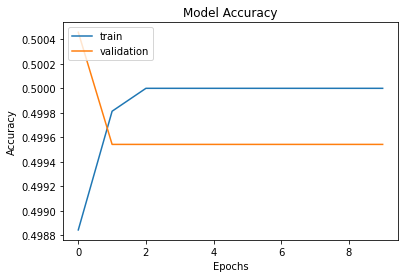

In [ ]:
# Training the model 2.1.3 Version 1

history_2_1_3_version_1= model_2_1_3_version_1.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
plot_hist(history_2_1_3_version_1)

Epoch 1/10
4096/4096 [==============================] - 160s 37ms/step - loss: 0.2587 - acc: 0.5003 - val_loss: 0.2502 - val_acc: 0.5005
Epoch 2/10
4096/4096 [==============================] - 146s 36ms/step - loss: 0.2522 - acc: 0.5002 - val_loss: 0.2502 - val_acc: 0.5005
Epoch 3/10
4096/4096 [==============================] - 150s 37ms/step - loss: 0.2511 - acc: 0.5005 - val_loss: 0.2501 - val_acc: 0.5005
Epoch 4/10
4096/4096 [==============================] - 147s 36ms/step - loss: 0.2507 - acc: 0.5002 - val_loss: 0.2503 - val_acc: 0.5005
Epoch 5/10
4096/4096 [==============================] - 150s 37ms/step - loss: 0.2505 - acc: 0.4995 - val_loss: 0.2502 - val_acc: 0.5005
Epoch 6/10
4096/4096 [==============================] - 150s 37ms/step - loss: 0.2503 - acc: 0.4998 - val_loss: 0.2501 - val_acc: 0.5005
Epoch 7/10
4096/4096 [==============================] - 149s 36ms/step - loss: 0.2503 - acc: 0.5007 - val_loss: 0.2501 - val_acc: 0.5005
Epoch 8/10
4096/4096 [===================

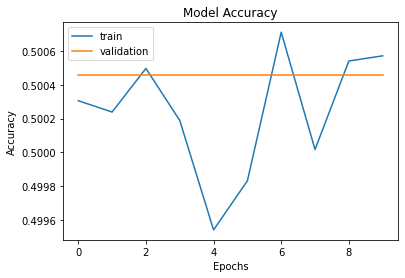

In [19]:
# Training the model 2.2.1 Version 1

history_2_2_1_version_1= model_2_2_1_version_1.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
plot_hist(history_2_2_1_version_1)

Epoch 1/10
4096/4096 [==============================] - 150s 36ms/step - loss: 0.2672 - acc: 0.5000 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 2/10
4096/4096 [==============================] - 171s 42ms/step - loss: 0.2613 - acc: 0.4993 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 3/10
4096/4096 [==============================] - 148s 36ms/step - loss: 0.2586 - acc: 0.4997 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 4/10
4096/4096 [==============================] - 149s 36ms/step - loss: 0.2568 - acc: 0.5011 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 5/10
4096/4096 [==============================] - 151s 37ms/step - loss: 0.2559 - acc: 0.4995 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 6/10
4096/4096 [==============================] - 152s 37ms/step - loss: 0.2550 - acc: 0.5002 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 7/10
4096/4096 [==============================] - 149s 36ms/step - loss: 0.2544 - acc: 0.4999 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 8/10
4096/4096 [===================

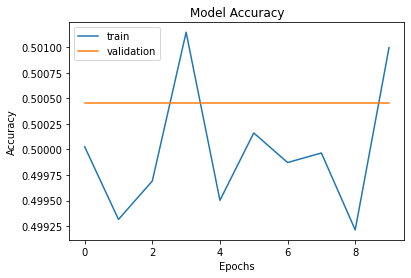

In [20]:
# Training the model 2.2.2 Version 1

history_2_2_2_version_1= model_2_2_2_version_1.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
plot_hist(history_2_2_2_version_1)

Epoch 1/10
4096/4096 [==============================] - 151s 37ms/step - loss: 0.2510 - acc: 0.5003 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 2/10
4096/4096 [==============================] - 172s 42ms/step - loss: 0.2500 - acc: 0.5002 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 3/10
4096/4096 [==============================] - 176s 43ms/step - loss: 0.2500 - acc: 0.5005 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 4/10
4096/4096 [==============================] - 150s 37ms/step - loss: 0.2500 - acc: 0.5006 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 5/10
4096/4096 [==============================] - 154s 38ms/step - loss: 0.2478 - acc: 0.5141 - val_loss: 0.2117 - val_acc: 0.6432
Epoch 6/10
4096/4096 [==============================] - 179s 44ms/step - loss: 0.1913 - acc: 0.7096 - val_loss: 0.1392 - val_acc: 0.8069
Epoch 7/10
4096/4096 [==============================] - 182s 44ms/step - loss: 0.1605 - acc: 0.7708 - val_loss: 0.1599 - val_acc: 0.7668
Epoch 8/10
4096/4096 [===================

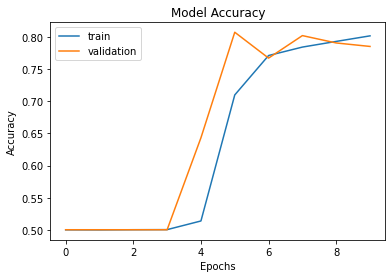

In [21]:
# Training the model 2.2.3 Version 1

history_2_2_3_version_1= model_2_2_3_version_1.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
plot_hist(history_2_2_3_version_1)

Epoch 1/10
4096/4096 [==============================] - 159s 39ms/step - loss: 1.0001 - acc: 0.5001 - val_loss: 0.9996 - val_acc: 0.5005
Epoch 2/10
4096/4096 [==============================] - 147s 36ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 3/10
4096/4096 [==============================] - 152s 37ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9994 - val_acc: 0.5005
Epoch 4/10
4096/4096 [==============================] - 149s 36ms/step - loss: 0.9999 - acc: 0.5000 - val_loss: 0.9992 - val_acc: 0.5005
Epoch 5/10
4096/4096 [==============================] - 156s 38ms/step - loss: 0.9997 - acc: 0.5000 - val_loss: 0.9978 - val_acc: 0.5005
Epoch 6/10
4096/4096 [==============================] - 151s 37ms/step - loss: 0.9909 - acc: 0.5209 - val_loss: 0.9176 - val_acc: 0.6608
Epoch 7/10
4096/4096 [==============================] - 153s 37ms/step - loss: 0.8885 - acc: 0.6221 - val_loss: 0.8388 - val_acc: 0.6634
Epoch 8/10
4096/4096 [===================

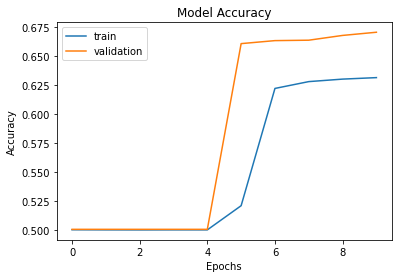

In [22]:
# Training the model 3.1.1 Version 1

history_3_1_1_version_1= model_3_1_1_version_1.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
plot_hist(history_3_1_1_version_1)

Epoch 1/10
4096/4096 [==============================] - 150s 37ms/step - loss: 0.8680 - acc: 0.6329 - val_loss: 0.8295 - val_acc: 0.6713
Epoch 2/10
4096/4096 [==============================] - 171s 42ms/step - loss: 0.8666 - acc: 0.6344 - val_loss: 0.8291 - val_acc: 0.6719
Epoch 3/10
4096/4096 [==============================] - 158s 38ms/step - loss: 0.8655 - acc: 0.6352 - val_loss: 0.8285 - val_acc: 0.6717
Epoch 4/10
4096/4096 [==============================] - 153s 37ms/step - loss: 0.8646 - acc: 0.6361 - val_loss: 0.8271 - val_acc: 0.6734
Epoch 5/10
4096/4096 [==============================] - 150s 37ms/step - loss: 0.8636 - acc: 0.6372 - val_loss: 0.8265 - val_acc: 0.6739
Epoch 6/10
4096/4096 [==============================] - 153s 37ms/step - loss: 0.8631 - acc: 0.6376 - val_loss: 0.8261 - val_acc: 0.6743
Epoch 7/10
4096/4096 [==============================] - 150s 37ms/step - loss: 0.8621 - acc: 0.6387 - val_loss: 0.8254 - val_acc: 0.6753
Epoch 8/10
4096/4096 [===================

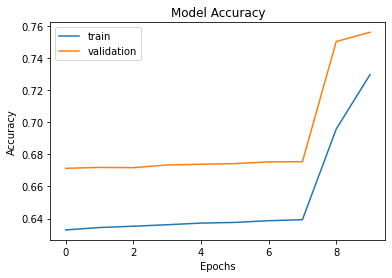

In [23]:
# Training the model 3.1.1 Version 1

history_3_1_1_version_1= model_3_1_1_version_1.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
plot_hist(history_3_1_1_version_1)

Epoch 1/10
4096/4096 [==============================] - 152s 37ms/step - loss: 0.9976 - acc: 0.5074 - val_loss: 0.9951 - val_acc: 0.5635
Epoch 2/10
4096/4096 [==============================] - 149s 36ms/step - loss: 0.9951 - acc: 0.5148 - val_loss: 0.9896 - val_acc: 0.6180
Epoch 3/10
4096/4096 [==============================] - 154s 38ms/step - loss: 0.9872 - acc: 0.5383 - val_loss: 0.9657 - val_acc: 0.6565
Epoch 4/10
4096/4096 [==============================] - 152s 37ms/step - loss: 0.9462 - acc: 0.6003 - val_loss: 0.8743 - val_acc: 0.6603
Epoch 5/10
4096/4096 [==============================] - 153s 37ms/step - loss: 0.8965 - acc: 0.6216 - val_loss: 0.8501 - val_acc: 0.6610
Epoch 6/10
4096/4096 [==============================] - 151s 37ms/step - loss: 0.8852 - acc: 0.6230 - val_loss: 0.8439 - val_acc: 0.6624
Epoch 7/10
4096/4096 [==============================] - 156s 38ms/step - loss: 0.8815 - acc: 0.6241 - val_loss: 0.8417 - val_acc: 0.6632
Epoch 8/10
4096/4096 [===================

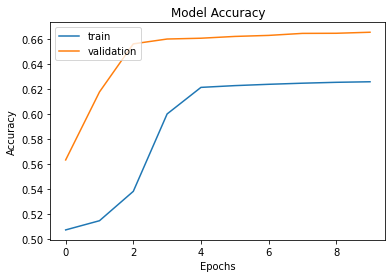

In [25]:
# Training the model 3.1.2 Version 1

history_3_1_2_version_1= model_3_1_2_version_1.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
plot_hist(history_3_1_2_version_1)

Epoch 1/10
4096/4096 [==============================] - 152s 37ms/step - loss: 0.9015 - acc: 0.5990 - val_loss: 0.8762 - val_acc: 0.6240
Epoch 2/10
4096/4096 [==============================] - 153s 37ms/step - loss: 0.8734 - acc: 0.6266 - val_loss: 0.8320 - val_acc: 0.6678
Epoch 3/10
4096/4096 [==============================] - 155s 38ms/step - loss: 0.8705 - acc: 0.6295 - val_loss: 0.8326 - val_acc: 0.6675
Epoch 4/10
4096/4096 [==============================] - 154s 38ms/step - loss: 0.8758 - acc: 0.6242 - val_loss: 0.8345 - val_acc: 0.6654
Epoch 5/10
4096/4096 [==============================] - 154s 38ms/step - loss: 0.8697 - acc: 0.6303 - val_loss: 0.8328 - val_acc: 0.6675
Epoch 6/10
4096/4096 [==============================] - 157s 38ms/step - loss: 0.8671 - acc: 0.6329 - val_loss: 0.8305 - val_acc: 0.6696
Epoch 7/10
4096/4096 [==============================] - 181s 44ms/step - loss: 0.8688 - acc: 0.6312 - val_loss: 0.8317 - val_acc: 0.6682
Epoch 8/10
4096/4096 [===================

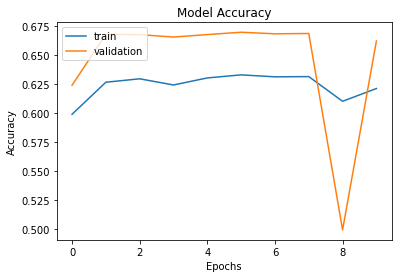

In [26]:
# Training the model 3.1.3 Version 1

history_3_1_3_version_1= model_3_1_3_version_1.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
plot_hist(history_3_1_3_version_1)

Epoch 1/10
4096/4096 [==============================] - 151s 37ms/step - loss: 0.2560 - acc: 0.4992 - val_loss: 0.2501 - val_acc: 0.5005
Epoch 2/10
4096/4096 [==============================] - 149s 36ms/step - loss: 0.2513 - acc: 0.5006 - val_loss: 0.2501 - val_acc: 0.5005
Epoch 3/10
4096/4096 [==============================] - 154s 38ms/step - loss: 0.2506 - acc: 0.5012 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 4/10
4096/4096 [==============================] - 152s 37ms/step - loss: 0.2504 - acc: 0.5000 - val_loss: 0.2502 - val_acc: 0.5005
Epoch 5/10
4096/4096 [==============================] - 153s 37ms/step - loss: 0.2503 - acc: 0.5009 - val_loss: 0.2501 - val_acc: 0.5005
Epoch 6/10
4096/4096 [==============================] - 153s 37ms/step - loss: 0.2502 - acc: 0.5007 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 7/10
4096/4096 [==============================] - 154s 38ms/step - loss: 0.2502 - acc: 0.5005 - val_loss: 0.2501 - val_acc: 0.5005
Epoch 8/10
4096/4096 [===================

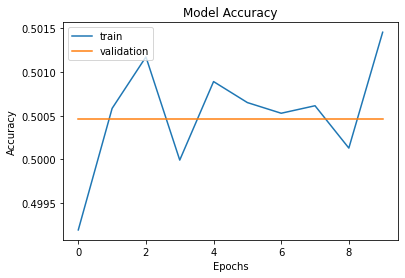

In [27]:
# Training the model 3.2.1 Version 1

history_3_2_1_version_1= model_3_2_1_version_1.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
plot_hist(history_3_2_1_version_1)

Epoch 1/10
4096/4096 [==============================] - 151s 37ms/step - loss: 0.2594 - acc: 0.5009 - val_loss: 0.2499 - val_acc: 0.5005
Epoch 2/10
4096/4096 [==============================] - 149s 36ms/step - loss: 0.2552 - acc: 0.5006 - val_loss: 0.2499 - val_acc: 0.5005
Epoch 3/10
4096/4096 [==============================] - 156s 38ms/step - loss: 0.2538 - acc: 0.4995 - val_loss: 0.2499 - val_acc: 0.6330
Epoch 4/10
4096/4096 [==============================] - 153s 37ms/step - loss: 0.2528 - acc: 0.5012 - val_loss: 0.2499 - val_acc: 0.5005
Epoch 5/10
4096/4096 [==============================] - 157s 38ms/step - loss: 0.2522 - acc: 0.5014 - val_loss: 0.2499 - val_acc: 0.5005
Epoch 6/10
4096/4096 [==============================] - 153s 37ms/step - loss: 0.2519 - acc: 0.5004 - val_loss: 0.2499 - val_acc: 0.5005
Epoch 7/10
4096/4096 [==============================] - 154s 38ms/step - loss: 0.2517 - acc: 0.5007 - val_loss: 0.2499 - val_acc: 0.4831
Epoch 8/10
4096/4096 [===================

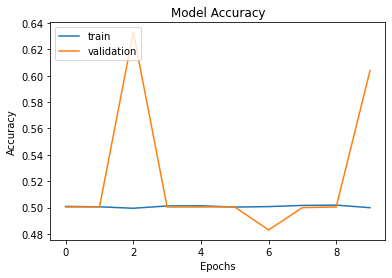

In [28]:
# Training the model 3.2.2 Version 1

history_3_2_2_version_1= model_3_2_2_version_1.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
plot_hist(history_3_2_2_version_1)

Epoch 1/10
4096/4096 [==============================] - 153s 37ms/step - loss: 0.2263 - acc: 0.6200 - val_loss: 0.2125 - val_acc: 0.7038
Epoch 2/10
4096/4096 [==============================] - 151s 37ms/step - loss: 0.1698 - acc: 0.7532 - val_loss: 0.1505 - val_acc: 0.7772
Epoch 3/10
4096/4096 [==============================] - 157s 38ms/step - loss: 0.1362 - acc: 0.8087 - val_loss: 0.1376 - val_acc: 0.8041
Epoch 4/10
4096/4096 [==============================] - 155s 38ms/step - loss: 0.1192 - acc: 0.8346 - val_loss: 0.1415 - val_acc: 0.7945
Epoch 5/10
4096/4096 [==============================] - 154s 38ms/step - loss: 0.1077 - acc: 0.8530 - val_loss: 0.1526 - val_acc: 0.7896
Epoch 6/10
4096/4096 [==============================] - 156s 38ms/step - loss: 0.0980 - acc: 0.8684 - val_loss: 0.1354 - val_acc: 0.8154
Epoch 7/10
4096/4096 [==============================] - 184s 45ms/step - loss: 0.0890 - acc: 0.8826 - val_loss: 0.1371 - val_acc: 0.8125
Epoch 8/10
4096/4096 [===================

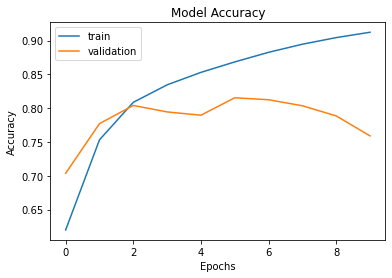

In [29]:
# Training the model 3.2.3 Version 1

history_3_2_3_version_1= model_3_2_3_version_1.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
plot_hist(history_3_2_3_version_1)

In [ ]:
# Testing the models

print("Test dataset accuracy for model 1.1.1 version 1 is: {0:.4f}".format(model_1_1_1_version_1.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 1.1.2 version 1 is: {0:.4f}".format(model_1_1_2_version_1.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 1.1.3 version 1 is: {0:.4f}".format(model_1_1_3_version_1.evaluate(test_ds, steps=steps, verbose=1)[1]))

print("Test dataset accuracy for model 1.2.1 version 1 is: {0:.4f}".format(model_1_2_1_version_1.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 1.2.2 version 1 is: {0:.4f}".format(model_1_2_2_version_1.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 1.2.3 version 1 is: {0:.4f}".format(model_1_2_3_version_1.evaluate(test_ds, steps=steps, verbose=1)[1]))

print("Test dataset accuracy for model 2.1.1 version 1 is: {0:.4f}".format(model_2_1_1_version_1.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 2.1.2 version 1 is: {0:.4f}".format(model_2_1_2_version_1.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 2.1.3 version 1 is: {0:.4f}".format(model_2_1_3_version_1.evaluate(test_ds, steps=steps, verbose=1)[1]))

256/256 [==============================] - 8s 32ms/step - loss: 0.7308 - acc: 0.7690
Test dataset accuracy for model 1.1.1 version 1 is: 0.7690
256/256 [==============================] - 8s 29ms/step - loss: 0.7255 - acc: 0.7763
Test dataset accuracy for model 1.1.2 version 1 is: 0.7763
256/256 [==============================] - 8s 29ms/step - loss: 0.9998 - acc: 0.5002
Test dataset accuracy for model 1.1.3 version 1 is: 0.5002
256/256 [==============================] - 8s 29ms/step - loss: 0.1476 - acc: 0.7986
Test dataset accuracy for model 1.2.1 version 1 is: 0.7986
256/256 [==============================] - 8s 29ms/step - loss: 0.1612 - acc: 0.7695
Test dataset accuracy for model 1.2.2 version 1 is: 0.7695
256/256 [==============================] - 7s 29ms/step - loss: 0.1720 - acc: 0.7935
Test dataset accuracy for model 1.2.3 version 1 is: 0.7935
256/256 [==============================] - 8s 30ms/step - loss: 0.9998 - acc: 0.5002
Test dataset accuracy for model 2.1.1 version 1 is:

In [32]:
import joblib

In [ ]:

joblib.dump(model_1_1_1_version_1, 'model_1_1_1_version_1')
joblib.dump(model_1_1_2_version_1, 'model_1_1_2_version_1')
joblib.dump(model_1_1_3_version_1, 'model_1_1_3_version_1')

joblib.dump(model_1_2_1_version_1, 'model_1_2_1_version_1')
joblib.dump(model_1_2_2_version_1, 'model_1_2_2_version_1')
joblib.dump(model_1_2_3_version_1, 'model_1_2_3_version_1')

joblib.dump(model_2_1_1_version_1, 'model_2_1_1_version_1')
joblib.dump(model_2_1_2_version_1, 'model_2_1_2_version_1')
joblib.dump(model_2_1_3_version_1, 'model_2_1_3_version_1')

INFO:tensorflow:Assets written to: ram://b7286f7b-200b-41b7-bab6-e54ae9a7902b/assets


INFO:tensorflow:Assets written to: ram://b7286f7b-200b-41b7-bab6-e54ae9a7902b/assets


INFO:tensorflow:Assets written to: ram://9df2c7cc-5611-4d2d-b96e-d43638465896/assets


INFO:tensorflow:Assets written to: ram://9df2c7cc-5611-4d2d-b96e-d43638465896/assets


INFO:tensorflow:Assets written to: ram://e051a648-a2fb-4c85-acf8-776bc69c6530/assets


INFO:tensorflow:Assets written to: ram://e051a648-a2fb-4c85-acf8-776bc69c6530/assets


INFO:tensorflow:Assets written to: ram://5cbe387b-a8d5-4e9f-911e-422d1f5d4180/assets


INFO:tensorflow:Assets written to: ram://5cbe387b-a8d5-4e9f-911e-422d1f5d4180/assets


INFO:tensorflow:Assets written to: ram://da320dae-948f-4c9c-a1d8-26501895c8db/assets


INFO:tensorflow:Assets written to: ram://da320dae-948f-4c9c-a1d8-26501895c8db/assets


INFO:tensorflow:Assets written to: ram://0ff83324-501b-4170-b3c8-d691c77a97f3/assets


INFO:tensorflow:Assets written to: ram://0ff83324-501b-4170-b3c8-d691c77a97f3/assets


INFO:tensorflow:Assets written to: ram://208d421e-fd78-4da5-b7b9-fe927dc229dc/assets


INFO:tensorflow:Assets written to: ram://208d421e-fd78-4da5-b7b9-fe927dc229dc/assets


INFO:tensorflow:Assets written to: ram://dd5eeed4-04d1-474f-8232-668418d4417f/assets


INFO:tensorflow:Assets written to: ram://dd5eeed4-04d1-474f-8232-668418d4417f/assets


INFO:tensorflow:Assets written to: ram://19af0dfb-7b18-4976-958e-9e1b35cdae08/assets


INFO:tensorflow:Assets written to: ram://19af0dfb-7b18-4976-958e-9e1b35cdae08/assets


['model_2_1_3_version_1']

In [ ]:

model_1_1_1_version_1_object= joblib.load('model_1_1_1_version_1')
model_1_1_2_version_1_object= joblib.load('model_1_1_2_version_1')
model_1_1_3_version_1_object= joblib.load('model_1_1_3_version_1')

model_1_2_1_version_1_object= joblib.load('model_1_2_1_version_1')
model_1_2_2_version_1_object= joblib.load('model_1_2_2_version_1')
model_1_2_3_version_1_object= joblib.load('model_1_2_3_version_1')

model_2_1_1_version_1_object= joblib.load('model_2_1_1_version_1')
model_2_1_2_version_1_object= joblib.load('model_2_1_2_version_1')
model_2_1_3_version_1_object= joblib.load('model_2_1_3_version_1')

In [ ]:
# Testing the models using the model objects


print("Test dataset accuracy for model 1.1.1 version 1 is: {0:.4f}".format(model_1_1_1_version_1_object.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 1.1.2 version 1 is: {0:.4f}".format(model_1_1_2_version_1_object.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 1.1.3 version 1 is: {0:.4f}".format(model_1_1_3_version_1_object.evaluate(test_ds, steps=steps, verbose=1)[1]))

print("Test dataset accuracy for model 1.2.1 version 1 is: {0:.4f}".format(model_1_2_1_version_1_object.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 1.2.2 version 1 is: {0:.4f}".format(model_1_2_2_version_1_object.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 1.2.3 version 1 is: {0:.4f}".format(model_1_2_3_version_1_object.evaluate(test_ds, steps=steps, verbose=1)[1]))

print("Test dataset accuracy for model 2.1.1 version 1 is: {0:.4f}".format(model_2_1_1_version_1_object.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 2.1.2 version 1 is: {0:.4f}".format(model_2_1_2_version_1_object.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 2.1.3 version 1 is: {0:.4f}".format(model_2_1_3_version_1_object.evaluate(test_ds, steps=steps, verbose=1)[1]))


256/256 [==============================] - 7s 28ms/step - loss: 0.7308 - acc: 0.7690
Test dataset accuracy for model 1.1.1 version 1 is: 0.7690
256/256 [==============================] - 8s 29ms/step - loss: 0.7255 - acc: 0.7763
Test dataset accuracy for model 1.1.2 version 1 is: 0.7763
256/256 [==============================] - 8s 30ms/step - loss: 0.9998 - acc: 0.5002
Test dataset accuracy for model 1.1.3 version 1 is: 0.5002
256/256 [==============================] - 8s 29ms/step - loss: 0.1476 - acc: 0.7986
Test dataset accuracy for model 1.2.1 version 1 is: 0.7986
256/256 [==============================] - 8s 29ms/step - loss: 0.1612 - acc: 0.7695
Test dataset accuracy for model 1.2.2 version 1 is: 0.7695
256/256 [==============================] - 8s 29ms/step - loss: 0.1720 - acc: 0.7935
Test dataset accuracy for model 1.2.3 version 1 is: 0.7935
256/256 [==============================] - 8s 30ms/step - loss: 0.9998 - acc: 0.5002
Test dataset accuracy for model 2.1.1 version 1 is:

Second part

In [30]:
print("Test dataset accuracy for model 2.2.1 version 1 is: {0:.4f}".format(model_2_2_1_version_1.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 2.2.2 version 1 is: {0:.4f}".format(model_2_2_2_version_1.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 2.2.3 version 1 is: {0:.4f}".format(model_2_2_3_version_1.evaluate(test_ds, steps=steps, verbose=1)[1]))

print("Test dataset accuracy for model 3.1.1 version 1 is: {0:.4f}".format(model_3_1_1_version_1.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 3.1.2 version 1 is: {0:.4f}".format(model_3_1_2_version_1.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 3.1.3 version 1 is: {0:.4f}".format(model_3_1_3_version_1.evaluate(test_ds, steps=steps, verbose=1)[1]))

print("Test dataset accuracy for model 3.2.1 version 1 is: {0:.4f}".format(model_3_2_1_version_1.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 3.2.2 version 1 is: {0:.4f}".format(model_3_2_2_version_1.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 3.2.3 version 1 is: {0:.4f}".format(model_3_2_3_version_1.evaluate(test_ds, steps=steps, verbose=1)[1]))


256/256 [==============================] - 10s 37ms/step - loss: 0.2503 - acc: 0.5002
Test dataset accuracy for model 2.2.1 version 1 is: 0.5002
256/256 [==============================] - 8s 30ms/step - loss: 0.2500 - acc: 0.5002
Test dataset accuracy for model 2.2.2 version 1 is: 0.5002
256/256 [==============================] - 8s 30ms/step - loss: 0.1598 - acc: 0.7639
Test dataset accuracy for model 2.2.3 version 1 is: 0.7639
256/256 [==============================] - 8s 30ms/step - loss: 0.7830 - acc: 0.7192
Test dataset accuracy for model 3.1.1 version 1 is: 0.7192
256/256 [==============================] - 8s 29ms/step - loss: 0.8559 - acc: 0.6467
Test dataset accuracy for model 3.1.2 version 1 is: 0.6467
256/256 [==============================] - 8s 30ms/step - loss: 0.8612 - acc: 0.6389
Test dataset accuracy for model 3.1.3 version 1 is: 0.6389
256/256 [==============================] - 8s 30ms/step - loss: 0.2500 - acc: 0.5002
Test dataset accuracy for model 3.2.1 version 1 is

In [33]:
joblib.dump(model_2_2_1_version_1, 'model_2_2_1_version_1')
joblib.dump(model_2_2_2_version_1, 'model_2_2_2_version_1')
joblib.dump(model_2_2_3_version_1, 'model_2_2_3_version_1')

joblib.dump(model_3_1_1_version_1, 'model_3_1_1_version_1')
joblib.dump(model_3_1_2_version_1, 'model_3_1_2_version_1')
joblib.dump(model_3_1_3_version_1, 'model_3_1_3_version_1')

joblib.dump(model_3_2_1_version_1, 'model_3_2_1_version_1')
joblib.dump(model_3_2_2_version_1, 'model_3_2_2_version_1')
joblib.dump(model_3_2_3_version_1, 'model_3_2_3_version_1')

INFO:tensorflow:Assets written to: ram://3c60c11f-25e9-4b0a-8405-a65c0bf12f46/assets


INFO:tensorflow:Assets written to: ram://3c60c11f-25e9-4b0a-8405-a65c0bf12f46/assets


INFO:tensorflow:Assets written to: ram://473177c5-fc2e-43f5-becd-7796a4135642/assets


INFO:tensorflow:Assets written to: ram://473177c5-fc2e-43f5-becd-7796a4135642/assets


INFO:tensorflow:Assets written to: ram://a5551414-f0af-4160-bc37-87eb96f1603a/assets


INFO:tensorflow:Assets written to: ram://a5551414-f0af-4160-bc37-87eb96f1603a/assets


INFO:tensorflow:Assets written to: ram://bf0f1ddb-34c0-4f85-9451-6ab7558d5cf1/assets


INFO:tensorflow:Assets written to: ram://bf0f1ddb-34c0-4f85-9451-6ab7558d5cf1/assets


INFO:tensorflow:Assets written to: ram://72ad141b-f93e-42ec-a1ed-2d1d87598d4f/assets


INFO:tensorflow:Assets written to: ram://72ad141b-f93e-42ec-a1ed-2d1d87598d4f/assets


INFO:tensorflow:Assets written to: ram://55c0cf97-9615-4730-9105-0a26665e99f3/assets


INFO:tensorflow:Assets written to: ram://55c0cf97-9615-4730-9105-0a26665e99f3/assets


INFO:tensorflow:Assets written to: ram://dffe689b-a911-4e1f-b54e-7d79679eb4f8/assets


INFO:tensorflow:Assets written to: ram://dffe689b-a911-4e1f-b54e-7d79679eb4f8/assets


INFO:tensorflow:Assets written to: ram://2c3c30eb-af72-4ab1-bc23-5ae820101f4f/assets


INFO:tensorflow:Assets written to: ram://2c3c30eb-af72-4ab1-bc23-5ae820101f4f/assets


INFO:tensorflow:Assets written to: ram://1cc729da-f49f-49ce-96f9-1e9a8045da2a/assets


INFO:tensorflow:Assets written to: ram://1cc729da-f49f-49ce-96f9-1e9a8045da2a/assets


['model_3_2_3_version_1']

In [34]:
model_2_2_1_version_1_object= joblib.load('model_2_2_1_version_1')
model_2_2_2_version_1_object= joblib.load('model_2_2_2_version_1')
model_2_2_3_version_1_object= joblib.load('model_2_2_3_version_1')

model_3_1_1_version_1_object= joblib.load('model_3_1_1_version_1')
model_3_1_2_version_1_object= joblib.load('model_3_1_2_version_1')
model_3_1_3_version_1_object= joblib.load('model_3_1_3_version_1')

model_3_2_1_version_1_object= joblib.load('model_3_2_1_version_1')
model_3_2_2_version_1_object= joblib.load('model_3_2_2_version_1')
model_3_2_3_version_1_object= joblib.load('model_3_2_3_version_1')

In [35]:
print("Test dataset accuracy for model 2.2.1 version 1 is: {0:.4f}".format(model_2_2_1_version_1_object.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 2.2.2 version 1 is: {0:.4f}".format(model_2_2_2_version_1_object.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 2.2.3 version 1 is: {0:.4f}".format(model_2_2_3_version_1_object.evaluate(test_ds, steps=steps, verbose=1)[1]))

print("Test dataset accuracy for model 3.1.1 version 1 is: {0:.4f}".format(model_3_1_1_version_1_object.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 3.1.2 version 1 is: {0:.4f}".format(model_3_1_2_version_1_object.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 3.1.3 version 1 is: {0:.4f}".format(model_3_1_3_version_1_object.evaluate(test_ds, steps=steps, verbose=1)[1]))

print("Test dataset accuracy for model 3.2.1 version 1 is: {0:.4f}".format(model_3_2_1_version_1_object.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 3.2.2 version 1 is: {0:.4f}".format(model_3_2_2_version_1_object.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 3.2.3 version 1 is: {0:.4f}".format(model_3_2_3_version_1_object.evaluate(test_ds, steps=steps, verbose=1)[1]))

256/256 [==============================] - 8s 30ms/step - loss: 0.2503 - acc: 0.5002
Test dataset accuracy for model 2.2.1 version 1 is: 0.5002
256/256 [==============================] - 8s 30ms/step - loss: 0.2500 - acc: 0.5002
Test dataset accuracy for model 2.2.2 version 1 is: 0.5002
256/256 [==============================] - 8s 30ms/step - loss: 0.1598 - acc: 0.7639
Test dataset accuracy for model 2.2.3 version 1 is: 0.7639
256/256 [==============================] - 7s 28ms/step - loss: 0.7830 - acc: 0.7192
Test dataset accuracy for model 3.1.1 version 1 is: 0.7192
256/256 [==============================] - 8s 29ms/step - loss: 0.8559 - acc: 0.6467
Test dataset accuracy for model 3.1.2 version 1 is: 0.6467
256/256 [==============================] - 8s 30ms/step - loss: 0.8612 - acc: 0.6389
Test dataset accuracy for model 3.1.3 version 1 is: 0.6389
256/256 [==============================] - 8s 30ms/step - loss: 0.2500 - acc: 0.5002
Test dataset accuracy for model 3.2.1 version 1 is: